In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors

In [2]:
df = pd.read_csv("../data/players_22.csv")
df

/tmp/ipykernel_2418/1328101311.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/players_22.csv")


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


In [4]:
features = ["short_name","overall", "potential", "wage_eur", "value_eur", "age" ]

In [5]:
df = df.dropna(subset=features)

In [6]:
newdf = df[features].copy()
newdf

,short_name,overall,potential,wage_eur,value_eur,age
0,L. Messi,93,93,320000.0,78000000.0,34
1,R. Lewandowski,92,92,270000.0,119500000.0,32
2,Cristiano Ronaldo,91,91,270000.0,45000000.0,36
3,Neymar Jr,91,91,270000.0,129000000.0,29
4,K. De Bruyne,91,91,350000.0,125500000.0,30
...,...,...,...,...,...,...
19234,Song Defu,47,52,1000.0,70000.0,22
19235,C. Porter,47,59,500.0,110000.0,19
19236,N. Logue,47,55,500.0,100000.0,21
19237,L. Rudden,47,60,500.0,110000.0,19


In [7]:
newdf.iloc[:, 1:]

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


In [8]:
df_process = newdf.iloc[:, 1:]
df_process

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


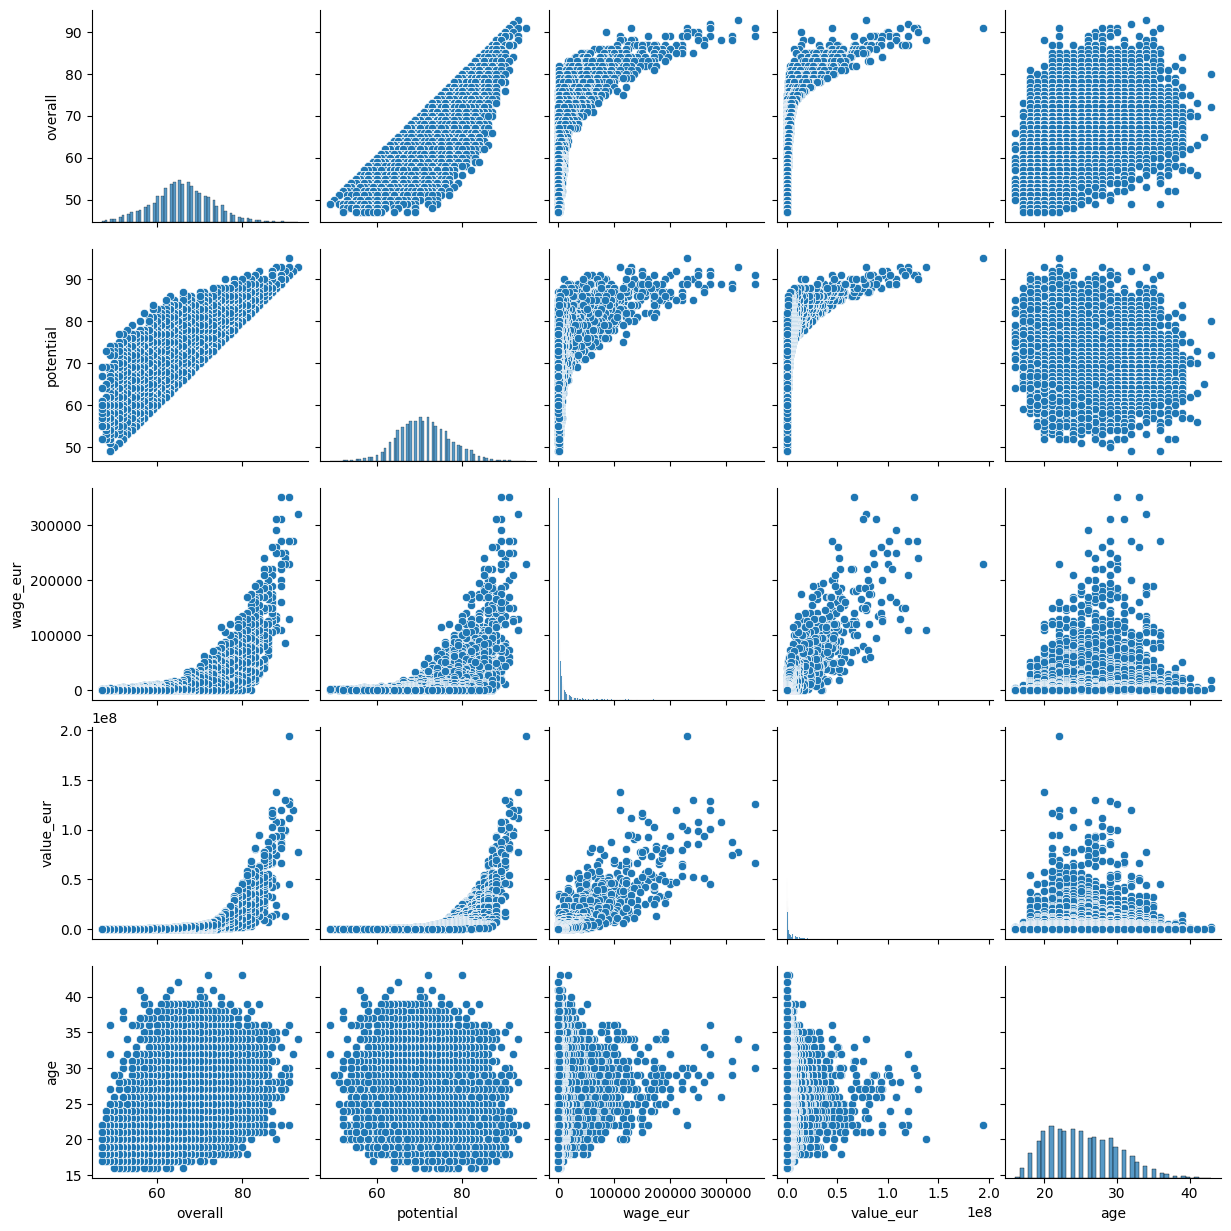

In [9]:
# Mengambil subset kolom yang ingin ditampilkan
To_Plot = ["overall", "potential", "wage_eur", "value_eur", "age"]
subset_df = df_process[To_Plot]

# Membuat pair plot menggunakan seaborn
sns.pairplot(subset_df)
plt.show()

# K-Means 

Algoritma K-means adalah algoritma clustering yang digunakan untuk mengelompokkan data ke dalam kelompok-kelompok berdasarkan kesamaan fitur. Dalam algoritma ini, titik pusat kelompok awal dipilih secara acak, dan kemudian data ditugaskan ke kelompok terdekat berdasarkan jarak. Pusat kelompok diperbarui secara iteratif hingga konvergensi tercapai. Algoritma ini dapat digunakan untuk memahami pola dalam data, tetapi keberhasilannya sangat tergantung pada inisialisasi awal dan jumlah kelompok yang tepat.

In [10]:
# Melakukan tahapan scaling data karena terdapat beberapa data pada kolum dengan rentang terlalu besar 
# tujuannya agar tidak ada suatu data kolum yang mendominasi
 
df_process = ((df_process - df_process.min()) / (df_process.max() - df_process.min())) * 9 + 1

In [11]:
df_process.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [12]:
#langkah selanjutnya adalah membuat centroid

centroid =  df_process.apply(lambda x: float(x.sample()))
centroid

/tmp/ipykernel_2418/1562109099.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid =  df_process.apply(lambda x: float(x.sample()))


overall      1.195652
potential    7.652174
wage_eur     1.006438
value_eur    1.078452
age          4.666667
dtype: float64

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

def random_centroids(newdf, k):
    centroids = []
    for i in range(k):
        centroid = newdf.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

def get_labels(newdf, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((newdf - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

def new_centroids(newdf, labels, k):
    return newdf.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

def plot_clusters(newdf, labels, centroids, iteration, colors=None, ax=None):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(newdf)
    centroids_2d = pca.transform(centroids.T)
    if ax is None:
        ax = plt.gca()
    ax.set_title(f'Iteration {iteration}')
    if colors is not None:
        ax.scatter(x=data_2d[:,0], y=data_2d[:,1], c=colors)
    else:
        ax.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    ax.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])

/tmp/ipykernel_2418/4130671392.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = newdf.apply(lambda x: float(x.sample()))
/tmp/ipykernel_2418/4130671392.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = newdf.apply(lambda x: float(x.sample()))
/tmp/ipykernel_2418/4130671392.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = newdf.apply(lambda x: float(x.sample()))
/tmp/ipykernel_2418/4130671392.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = newdf.apply(lambda x: float(x.sample()))
/tmp/ipykernel_2418/4130671392.py:8: FutureWarning: Calling floa

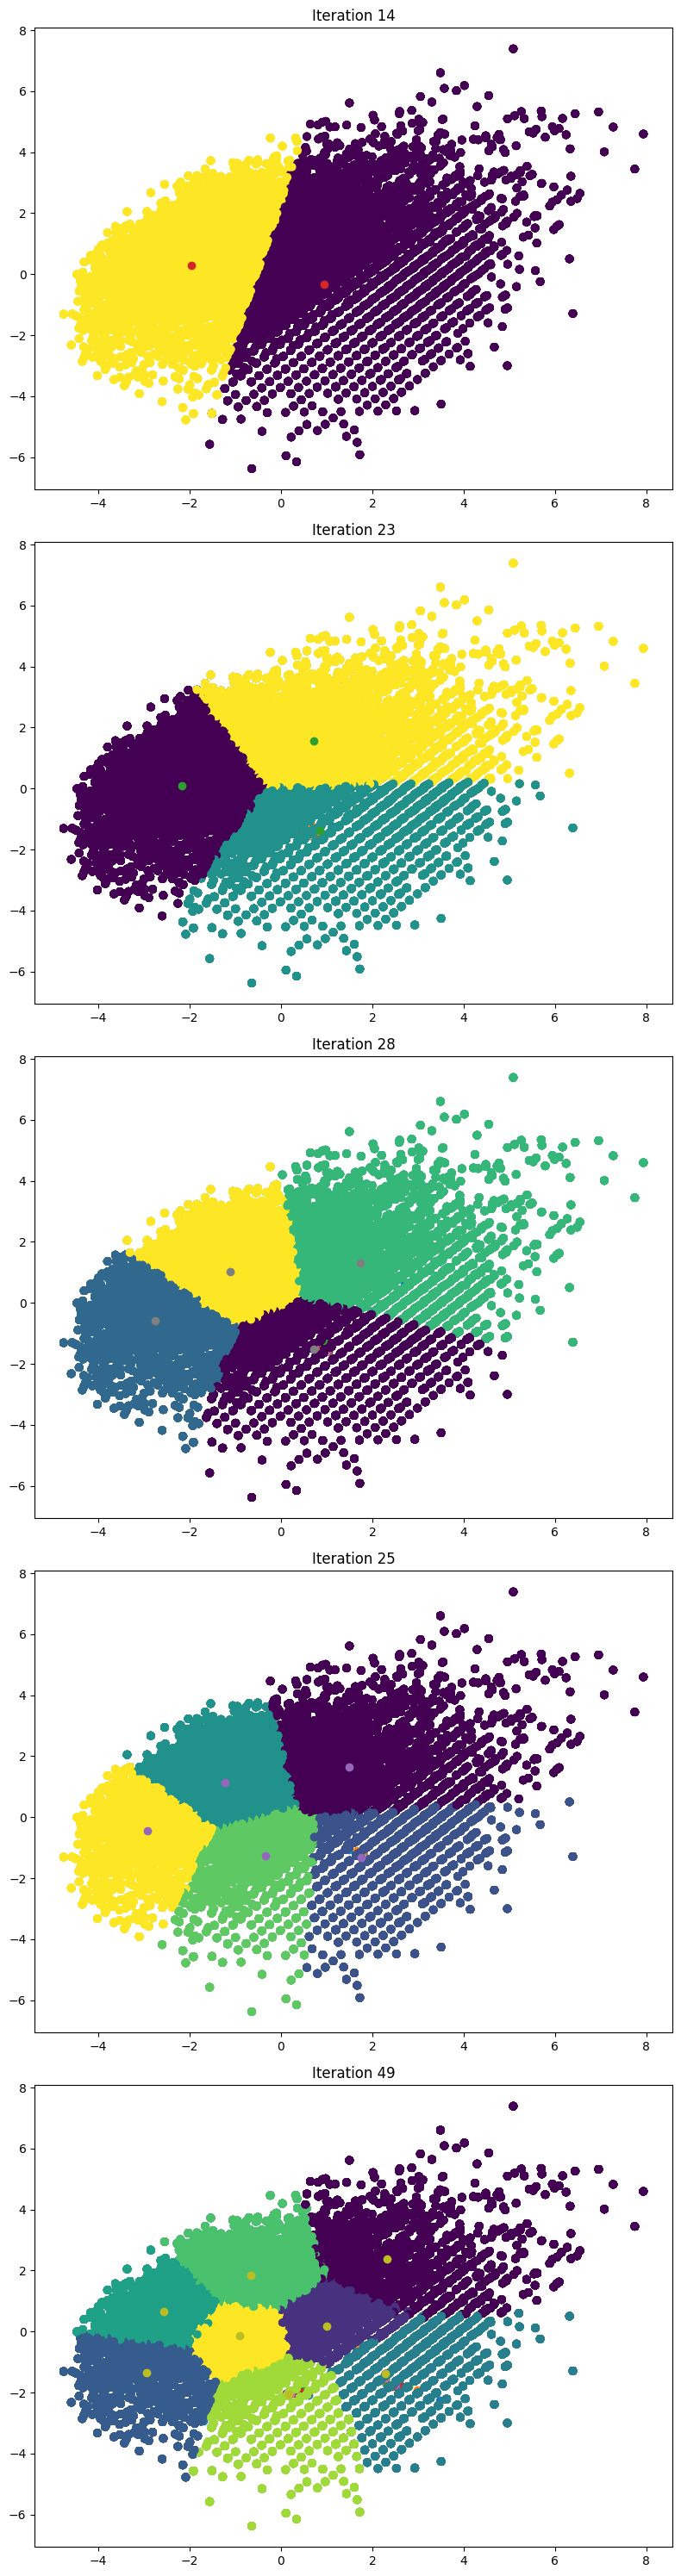

In [18]:
max_iterations = 100

# Daftar jumlah k cluster yang akan dicoba
k_values = [2, 3, 4, 5, 8]

# Mendefinisikan ukuran subplot
num_rows = len(k_values)
num_cols = 1

# Membuat subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 6 * num_rows))

# Loop melalui setiap nilai k
for i, k in enumerate(k_values):
    centroid_count = k
    centroids = random_centroids(df_process, centroid_count)
    old_centroids = pd.DataFrame()
    iteration = 1
    
    while iteration < max_iterations and not centroids.equals(old_centroids):
        old_centroids = centroids

        labels = get_labels(df_process, centroids)
        centroids = new_centroids(df_process, labels, centroid_count)
        plot_clusters(df_process, labels, centroids, iteration, ax=axes[i])
        iteration += 1

# Menampilkan subplot
plt.tight_layout()
plt.show()

Elbow Method :

Metode "elbow" (siku) adalah salah satu metode yang digunakan untuk membantu menentukan jumlah cluster yang optimal dalam algoritma K-Means. Tujuan dari metode ini adalah untuk menemukan titik di grafik inersia di mana penurunan inersia mulai melambat secara signifikan, membentuk kurva menyerupai siku.

Inersia adalah metrik yang digunakan dalam K-Means untuk mengukur sejauh mana setiap titik data dalam suatu cluster berada dari pusat clusternya. Semakin rendah inersia, semakin baik cluster tersebut menggambarkan data.


/home/wikan/clustering-fifa/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/wikan/clustering-fifa/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/wikan/clustering-fifa/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/wikan/clustering-fifa/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

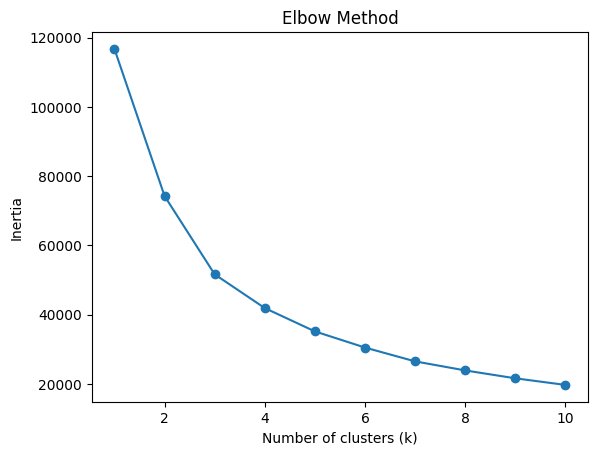

In [19]:
from sklearn.cluster import KMeans

# Menghitung inersia untuk berbagai nilai k
n =10
inertias = []
k_values = range(1, n+1)  # n adalah jumlah maksimal cluster yang ingin dicoba

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_process)
    inertias.append(kmeans.inertia_)

# Plot grafik inersia terhadap nilai k
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Mean-Shift Clustering

Metode Mean Shift adalah sebuah algoritma klastering yang digunakan untuk menemukan pusat-pusat klaster dalam data berdasarkan distribusi data yang diberikan. Metode ini bekerja dengan memperbarui pusat klaster berulang kali menggunakan konsep pusat massa lokal, di mana setiap titik data diperbarui dengan menghitung pusat massa dari titik-titik data di sekitarnya dengan memperhatikan fungsi kernel. Hal ini memungkinkan algoritma untuk menarik pusat klaster ke daerah dengan kepadatan data yang lebih tinggi, sehingga mencapai pusat klaster yang optimal. Kelebihan utama metode Mean Shift adalah kemampuannya dalam menentukan jumlah klaster secara otomatis tanpa memerlukan asumsi sebelumnya, serta dapat menangani bentuk klaster yang kompleks dan ukuran klaster yang berbeda-beda. Namun, metode ini dapat memakan waktu komputasi yang lama pada dataset yang besar. Metode Mean Shift telah diterapkan dalam berbagai bidang, termasuk visi komputer, pengenalan objek, analisis citra, dan pemrosesan data multidimensi.

In [20]:
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler

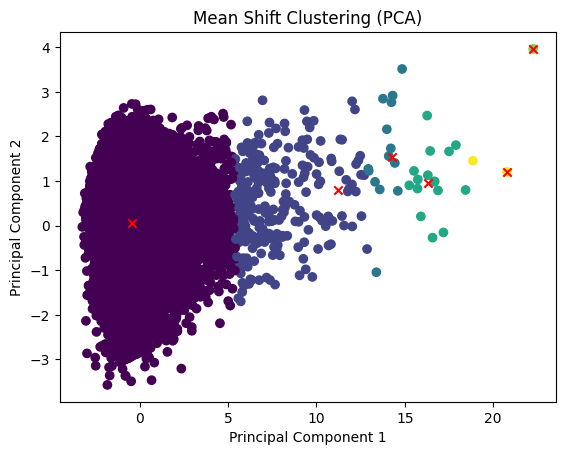

In [22]:
# Lakukan scaling pada dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_process)

# Lakukan PCA untuk mendapatkan dua komponen utama
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Buat objek MeanShift
mean_shift = MeanShift()

# Lakukan klastering menggunakan MeanShift
mean_shift.fit(pca_data)

# Dapatkan label klaster untuk setiap data
cluster_labels = mean_shift.labels_

# Dapatkan pusat klaster yang ditemukan
cluster_centers = mean_shift.cluster_centers_

# Visualisasi plot klaster
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Mean Shift Clustering (PCA)')
plt.show()

# Agglomerative Hierarchical Clustering

Metode Agglomerative Hierarchical Clustering adalah pendekatan klastering yang dimulai dengan setiap titik data sebagai klaster individu, kemudian secara iteratif menggabungkan klaster-klaster yang paling dekat satu sama lain berdasarkan jarak antara titik-titik data mereka. Pada setiap iterasi, jarak antara klaster dihitung menggunakan metode seperti Single Linkage, Complete Linkage, atau Average Linkage. Proses penggabungan dilanjutkan hingga semua titik data tergabung dalam satu klaster tunggal. Dalam metode ini, struktur hirarki klaster terbentuk dengan tingkatan penggabungan yang dapat direpresentasikan dalam bentuk dendrogram. Metode Agglomerative Hierarchical Clustering cocok untuk mengidentifikasi klaster yang saling terkait dan tidak memerlukan jumlah klaster yang diharapkan sebelumnya.

/home/wikan/clustering-fifa/.venv/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


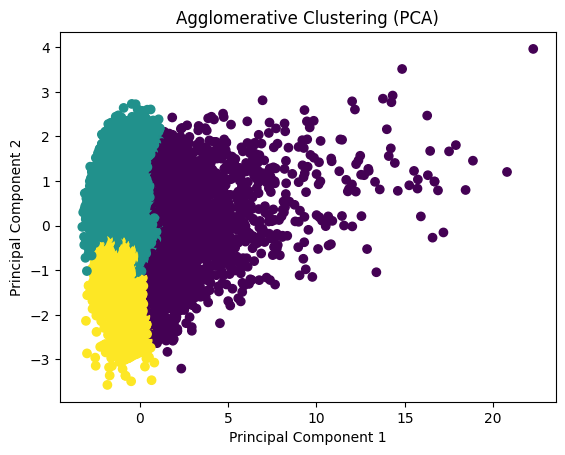

In [23]:
from sklearn.cluster import AgglomerativeClustering

# Buat objek AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

# Lakukan klastering menggunakan AgglomerativeClustering
cluster_labels = agg_clustering.fit_predict(pca_data)

# Visualisasi plot klaster
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Agglomerative Clustering (PCA)')
plt.show()

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) adalah teknik klastering yang mengidentifikasi klaster berdasarkan kerapatan data. DBSCAN mengasumsikan bahwa klaster terdiri dari area di mana titik-titik data saling berdekatan dengan kerapatan yang tinggi, sedangkan area di antara klaster memiliki kerapatan yang rendah. DBSCAN menggabungkan titik-titik data yang saling berdekatan dalam jarak tertentu ke dalam satu klaster, sementara titik-titik yang berada dalam area yang jarang dianggap sebagai noise atau anomali. DBSCAN secara otomatis menentukan jumlah klaster berdasarkan kerapatan data, sehingga tidak memerlukan jumlah klaster yang diharapkan sebelumnya.

Best Parameters:
eps = 0.7
min_samples = 5


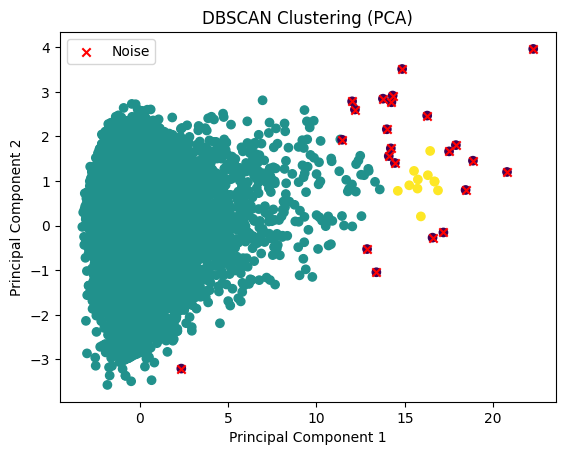

In [33]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

best_score = -1
best_eps = 0
best_min_samples = 0

eps_values = [0.1, 0.3, 0.5, 0.7]  # Daftar nilai eps yang ingin dicoba
min_samples_values = [5, 10, 15]  # Daftar nilai min_samples yang ingin dicoba

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(pca_data)
        if len(np.unique(cluster_labels)) > 1:
            score = silhouette_score(pca_data, cluster_labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print("Best Parameters:")
print("eps =", best_eps)
print("min_samples =", best_min_samples)

# Klastering menggunakan parameter terbaik
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
cluster_labels = dbscan.fit_predict(pca_data)
noise_indices = np.where(cluster_labels == -1)[0]

# Visualisasi plot klaster
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels)
plt.scatter(pca_data[noise_indices, 0], pca_data[noise_indices, 1], c='red', marker='x', label='Noise')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering (PCA)')
plt.legend()
plt.show()
